<a href="https://colab.research.google.com/github/sekhar0146/ML_Classification_projects/blob/main/cardio_analysis_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/cardio/cardio_train.csv", delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# converting days to years 
df['age'] = df['age']/365
df.age = df.age.astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# check for missing data
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
len(df.age.unique())

8076

In [ ]:
df.gender.unique()

array([2, 1], dtype=int64)

In [14]:
# EDA

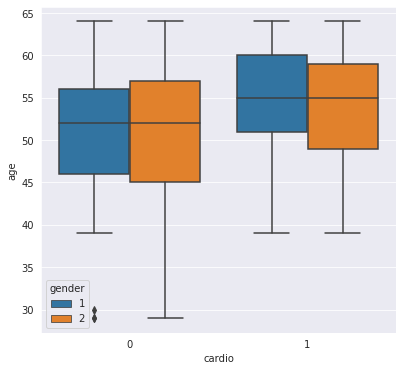

In [8]:
sns.set_style("darkgrid") 
plt.figure(figsize=(14,6))

#==> Gender vs average age : Survived
plt.subplot(1,2,2)
box_plot = sns.boxplot(x='cardio', y='age', hue='gender', data=df)

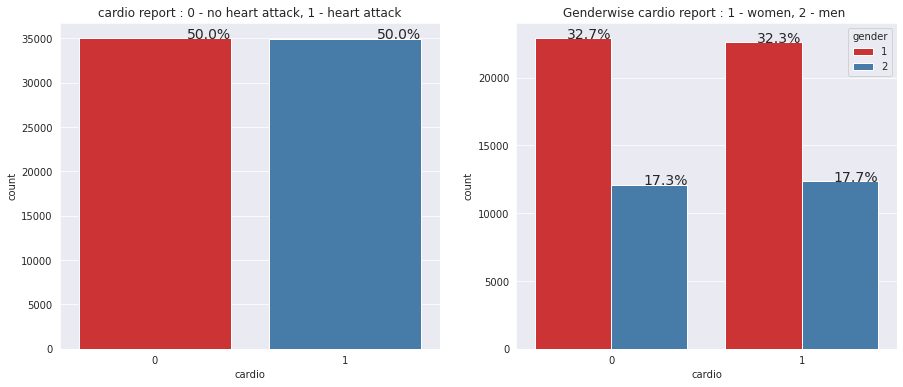

In [11]:
sns.set_style("darkgrid") 
plt.figure(figsize=(15,6))

#==> cardio count
plt.subplot(1,2,1)
s = sns.countplot(x='cardio', data=df, palette='Set1')
plt.title('cardio report : 0 - no heart attack, 1 - heart attack')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)

#==> Genderwise cardio report 
plt.subplot(1,2,2)
s = sns.countplot(x='cardio', hue='gender', data=df, palette='Set1')
plt.title('Genderwise cardio report : 1 - women, 2 - men ')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)
    

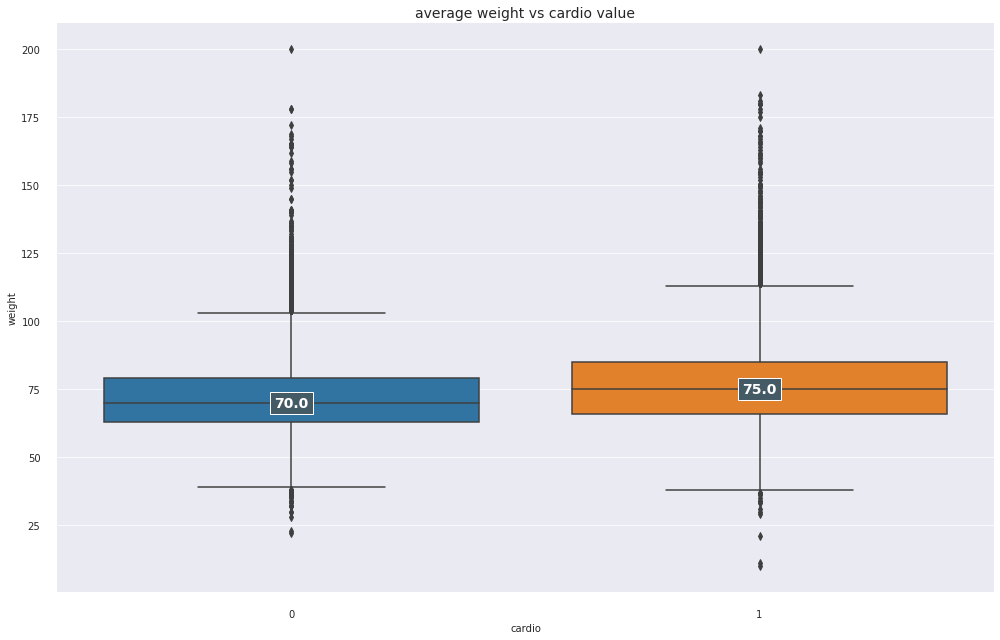

In [12]:
# Find out the average weight of a patient - using boxplot
plt.figure(figsize=(14,9))
sns.set_style("darkgrid")
box_plot = sns.boxplot(x="cardio", 
                       y="weight", 
                       data=df)
sns.despine(offset=10, trim=True)

# Diaplay mean data labels in boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.set_title("average weight vs cardio value", size="14")

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

In [15]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


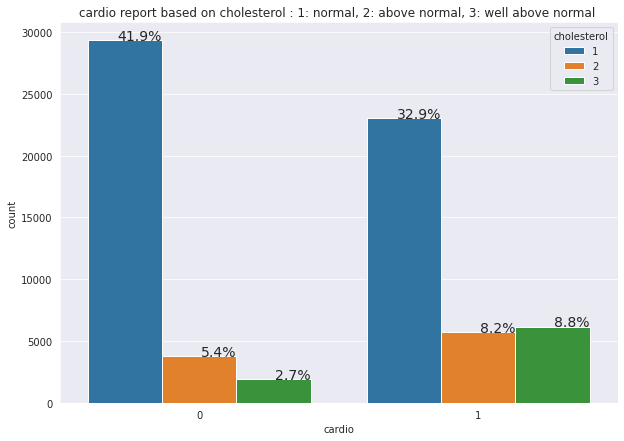

In [21]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
s = sns.countplot(x='cardio', hue='cholesterol', data=df)
plt.title("cardio report based on cholesterol : 1: normal, 2: above normal, 3: well above normal ")

# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)

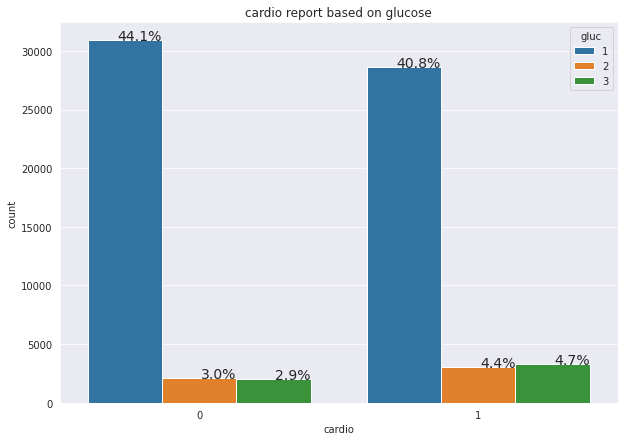

In [29]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
s = sns.countplot(x='cardio', hue='gluc', data=df)
plt.title("cardio report based on glucose")

# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)

In [30]:
# Split into X and y
X = df.drop(["id", "height", "cardio"], axis=1)
y = df["cardio"]

In [31]:
np.random.seed(42)
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 10), (14000, 10), (56000,), (14000,))

In [ ]:
# ===========================================
# Modele processing 
# ===========================================
models={"RandomForestClassifier": RandomForestClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(),
        "naive_bayes": GaussianNB(),
        "GradientBoostingClassifier": GradientBoostingClassifier()
        }

In [ ]:
  # create function to fit score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    # Loop thru models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model score and sppend it to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_scores

{'GradientBoostingClassifier': 0.7381428571428571,
 'KNeighborsClassifier': 0.7006428571428571,
 'LogisticRegression': 0.7278571428571429,
 'RandomForestClassifier': 0.6964285714285714,
 'naive_bayes': 0.5942142857142857}

In [ ]:
# Tune the RandomForestClassifier 
np.random.seed(42)
rfc = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_split=20, min_samples_leaf=4)
# Fit the model
rfc.fit(X_train, y_train)
# check the score
rfc.score(X_test, y_test)

0.7327142857142858

In [ ]:
# Tune the GradientBoostingClassifier manually
np.random.seed(42)
gbc = GradientBoostingClassifier(n_estimators=30, 
                                 max_depth=8, 
                                 min_samples_split=30, 
                                 min_samples_leaf=4,
                                 learning_rate=0.20,
                                 subsample=1.0)
# Fit the model
gbc.fit(X_train, y_train)
# check the score
gbc.score(X_test, y_test)

0.7406428571428572

In [32]:
# XGBClassifier()
np.random.seed(42)
xbc = XGBClassifier(n_estimators=60, 
                    max_depth=8,
                    learning_rate=0.02,
                    min_child_weight=1,
                    gamma=0.01,
                    subsample=1.0)
# Fit the model
xbc.fit(X_train, y_train)
# check the score
xbc.score(X_test, y_test)

0.7423571428571428

In [35]:
# Lets do prediction on XGBoost model
y_pred = xbc.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [36]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

# Confution matrix
print(confusion_matrix(y_test, y_pred))

[[5496 1492]
 [2115 4897]]


In [37]:
# visualize confusion matrix with pd.crosstab()
cf = pd.crosstab(y_test,
                 y_pred,
                 rownames=["Actual labels"],
                 colnames=["Predicted labels"])
cf

Predicted labels,0,1
Actual labels,,
0,5496,1492
1,2115,4897


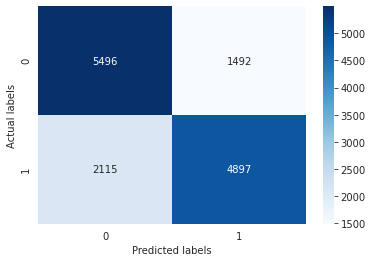

In [40]:
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g');

In [42]:
# Lets get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

